In [4]:
%matplotlib inline

#standard package import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

import pymc3 as pm
import theano.tensor as tt
import theano

#our package import
import neuronal

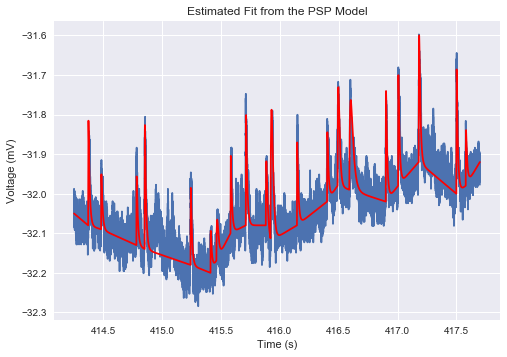

In [5]:
#chi-by-eye fit
twenty_psp = neuronal.NeuronalData(neuronal.get_example_data_file_path('PSP_data_for_analysis.txt'), num_psp=20)

t = twenty_psp.data['T'].values
v = twenty_psp.data['V'].values

num_psp = twenty_psp.num_psp
t_psp = [t[0], 414.37, 414.48, 414.78, 414.85, 415.24, 415.41, 415.46, 415.58, 415.71, 415.88, 415.92, 
         416.145, 416.401, 416.49, 416.59, 416.90, 417.005, 417.18, 417.50, 417.58, t[-1]]
b = [-32.05, -32.08, -32.09, -32.13, -32.14, -32.18, -32.20, -32.17, -32.10, -32.08, -32.08, -32.12, 
     -32.08, -32.02, -31.98, -31.99, -32.02, -31.98, -31.92, -32.00, -31.98, -31.92]
tau_d = [1.0, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 
         0.01, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 1.0]
tau_r = [1.0, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.005, 0.001, 0.001, 
         0.003, 0.008, 0.001, 0.001, 0.005, 0.008, 0.001, 0.001, 0.002, 0.001, 0.001, 1.0]
a = [1.0, 0.38, 0.2, 0.25, 0.45, 0.28, 0.15, 0.4, 0.28, 0.4, 0.4, 4, 0.3, 0.25, 1, 0.7, 0.4, 0.4, 0.6, 0.45, 0.2, 1.0]
sigma = 0.026

t_resize = np.tile(t, (len(t_psp), 1))
t_psp_resize = np.tile(t_psp, (len(t), 1)).T

t_psp_next = t_psp + np.hstack((np.diff(t_psp), 1e-5))
t_psp_next_resize = np.tile(t_psp_next, (len(t), 1)).T

a_resize = np.tile(a, (len(t), 1)).T
b_resize = np.tile(b, (len(t), 1)).T
tau_d_resize = np.tile(tau_d, (len(t), 1)).T
tau_r_resize = np.tile(tau_r, (len(t), 1)).T

b_next = b + np.hstack((np.diff(b), 1e-5))
b_next_resize = np.tile(b_next, (len(t), 1)).T

#Vectorized model
model = np.sum((t_resize >= t_psp_resize) * 
               (a_resize * (np.exp((t_resize>=t_psp_resize)*-(t_resize-t_psp_resize) / tau_d_resize) - 
                            np.exp((t_resize>=t_psp_resize)*-(t_resize-t_psp_resize) / tau_r_resize)) +
               (t_resize < t_psp_next_resize) * (b_resize + (b_next_resize - b_resize) / (t_psp_next_resize - t_psp_resize) * 
                                                 (t_resize - t_psp_resize))), axis=0)

plt.plot(t, v)
plt.plot(t, model, c='r')
plt.title('Estimated Fit from the PSP Model')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.show()

The vectorized model works when it's written with numpy functions.